<a href="https://colab.research.google.com/github/Sarayu-123/-FUTURE_ML_01-/blob/main/TASK_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive.zip


In [6]:


import pandas as pd


df = pd.read_csv("archive.zip", encoding='latin1')


print("First 5 rows of dataset:")
print(df.head())


print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Display the date range of orders
print("\nOrder Date Range:", df['Order Date'].min(), "to", df['Order Date'].max())

# Check unique regions/categories to understand business dimensions
print("\nUnique Regions:", df['Region'].unique())
print("Unique Categories:", df['Category'].unique())


First 5 rows of dataset:
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region    

In [7]:


# Make sure Order Date is datetime (already converted in Step 1)
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Aggregate sales by month
monthly_sales = df.groupby(pd.Grouper(key='Order Date', freq='M')).sum()['Sales'].reset_index()

# Rename columns for clarity
monthly_sales.columns = ['Order Date', 'Sales']

# Check first few rows
print("Monthly Aggregated Sales:")
print(monthly_sales.head())

# Check shape (number of months)
print("\nTotal Months in Dataset:", monthly_sales.shape[0])

# Check if there are missing months (Prophet/ARIMA need continuous time series)
all_months = pd.date_range(start=monthly_sales['Order Date'].min(),
                           end=monthly_sales['Order Date'].max(), freq='M')

missing_months = all_months.difference(monthly_sales['Order Date'])
print("\nMissing Months:", missing_months)


Monthly Aggregated Sales:
  Order Date      Sales
0 2015-01-31  19546.163
1 2015-02-28  11678.994
2 2015-03-31   6716.044
3 2015-04-30  12455.482
4 2015-05-31  15165.051

Total Months in Dataset: 48

Missing Months: DatetimeIndex([], dtype='datetime64[ns]', freq='ME')


/tmp/ipython-input-91232425.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.groupby(pd.Grouper(key='Order Date', freq='M')).sum()['Sales'].reset_index()
/tmp/ipython-input-91232425.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  all_months = pd.date_range(start=monthly_sales['Order Date'].min(),


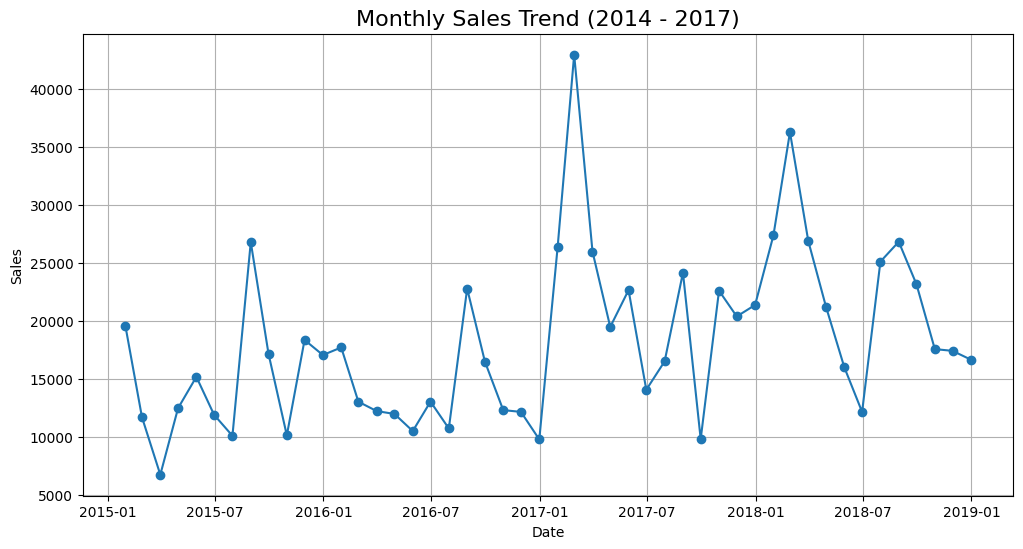

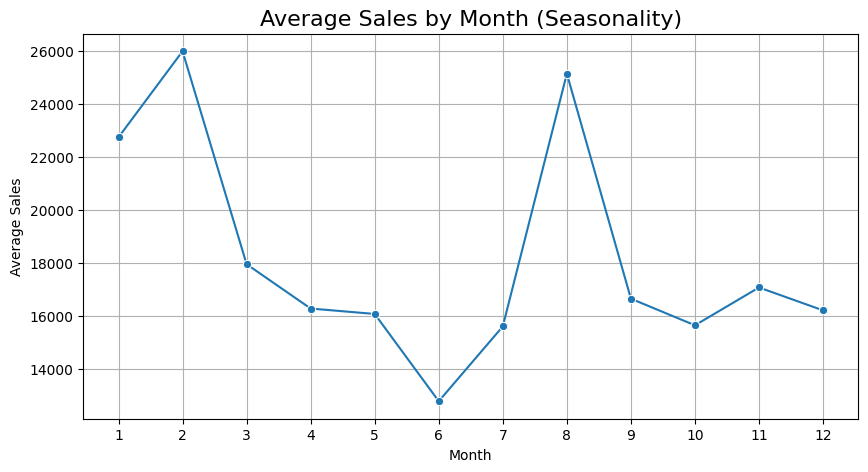

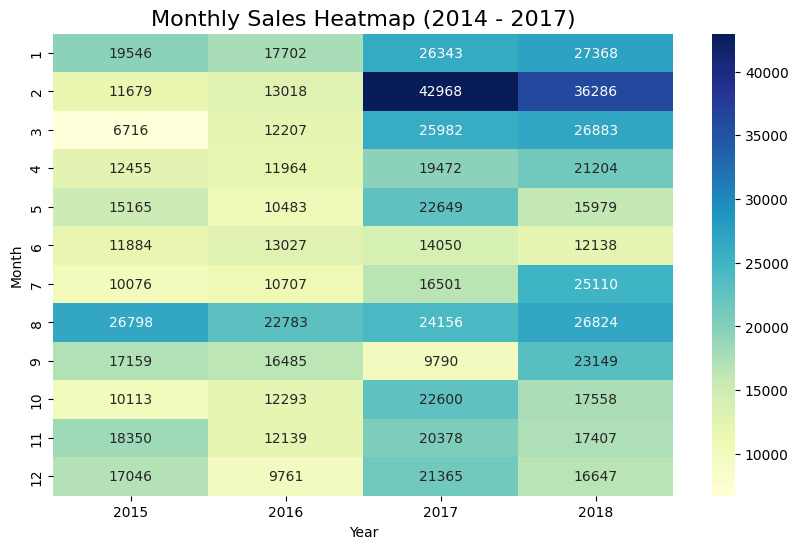

In [8]:


import matplotlib.pyplot as plt
import seaborn as sns

# 1. Plot overall monthly sales trend
plt.figure(figsize=(12,6))
plt.plot(monthly_sales['Order Date'], monthly_sales['Sales'], marker='o')
plt.title("Monthly Sales Trend (2014 - 2017)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

# 2. Add a Year and Month column for seasonality analysis
monthly_sales['Year'] = monthly_sales['Order Date'].dt.year
monthly_sales['Month'] = monthly_sales['Order Date'].dt.month

# Group by Month (ignoring year) to see average seasonal pattern
monthly_avg = monthly_sales.groupby('Month')['Sales'].mean()

plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values, marker='o')
plt.title("Average Sales by Month (Seasonality)", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.xticks(range(1,13))
plt.grid(True)
plt.show()

# 3. Heatmap of Year vs Month (for seasonality pattern)
pivot = monthly_sales.pivot(index="Month", columns="Year", values="Sales")

plt.figure(figsize=(10,6))
sns.heatmap(pivot, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title("Monthly Sales Heatmap (2014 - 2017)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Month")
plt.show()


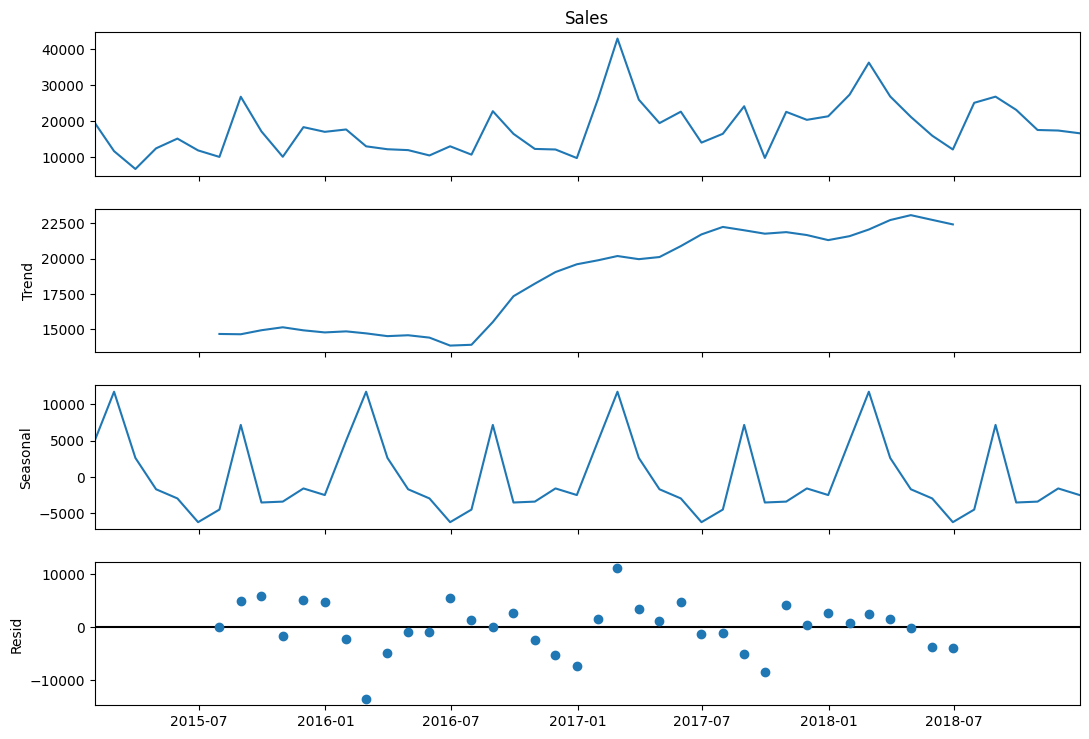

In [9]:


import statsmodels.api as sm

# Ensure Order Date is datetime index
monthly_sales.set_index('Order Date', inplace=True)

# Apply seasonal decomposition (additive model)
decomposition = sm.tsa.seasonal_decompose(monthly_sales['Sales'], model='additive')

# Plot decomposition
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()

# Reset index for next steps (Prophet needs columns, not index)
monthly_sales.reset_index(inplace=True)


Total data points: 9800
Training data points: 7840
Testing data points: 1960


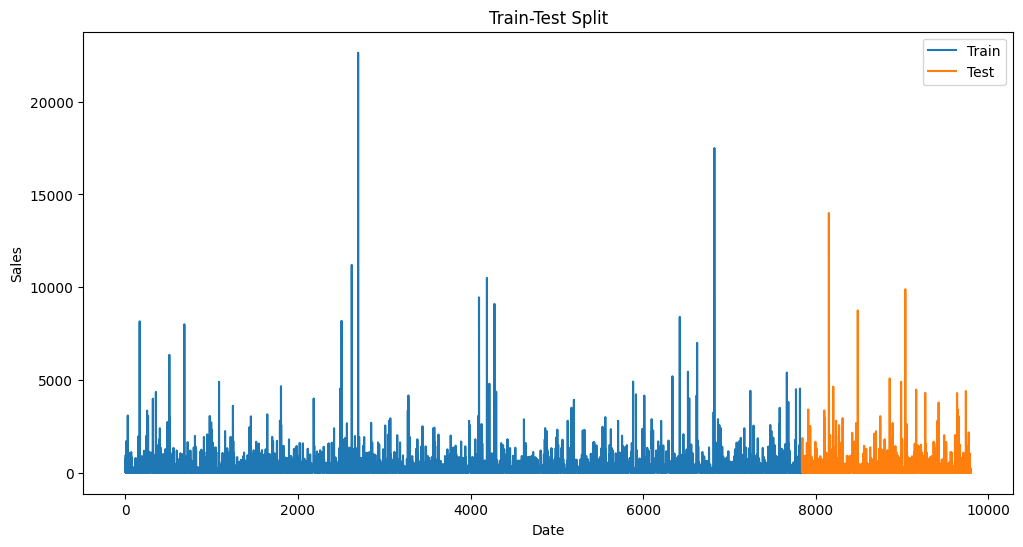

In [10]:
# Define the split ratio (e.g., 80% train, 20% test)
train_size = int(len(df) * 0.8)

# Split the data
train = df.iloc[:train_size]
test = df.iloc[train_size:]

# Check the sizes
print(f"Total data points: {len(df)}")
print(f"Training data points: {len(train)}")
print(f"Testing data points: {len(test)}")

# Optional: visualize the split
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.title("Train-Test Split")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()


DEBUG:cmdstanpy:input tempfile: /tmp/tmp5gei60u4/nrn9xkmn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5gei60u4/22pwbcbo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98736', 'data', 'file=/tmp/tmp5gei60u4/nrn9xkmn.json', 'init=/tmp/tmp5gei60u4/22pwbcbo.json', 'output', 'file=/tmp/tmp5gei60u4/prophet_modelj3h27yw6/prophet_model-20250920161556.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:15:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:15:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


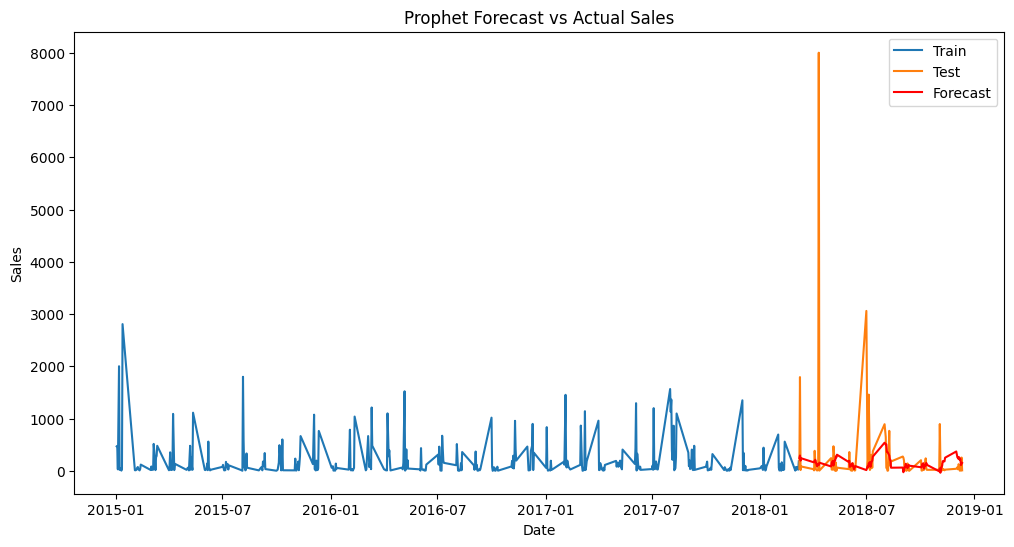

In [11]:
from prophet import Prophet
import matplotlib.pyplot as plt
import pandas as pd

# -------------------------------
# Prepare data
df_prophet = df.reset_index().rename(columns={'Order Date': 'ds', 'Sales': 'y'})

# Convert to datetime and drop invalid dates
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'], errors='coerce')
df_prophet = df_prophet.dropna(subset=['ds']).drop_duplicates(subset=['ds']).sort_values('ds')

# -------------------------------
# Train-test split: 80% train, 20% test
split_index = int(len(df_prophet) * 0.8)
train_prophet = df_prophet.iloc[:split_index].copy()
test_prophet = df_prophet.iloc[split_index:].copy()

if test_prophet.empty:
    raise ValueError(f"Test set is empty! Dataset too small after cleaning dates. "
                     f"Rows in dataset: {len(df_prophet)}")

# -------------------------------
# Fit Prophet model
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
model.fit(train_prophet)

# -------------------------------
# Create future dataframe covering test period
first_test_date = test_prophet['ds'].min()
last_test_date = test_prophet['ds'].max()
future_dates = pd.date_range(start=first_test_date, end=last_test_date, freq='D')
future = pd.DataFrame({'ds': future_dates})

# Predict
forecast = model.predict(future)

# -------------------------------
# Align forecast with actual test dates
forecast_test = forecast.loc[forecast['ds'].isin(test_prophet['ds']), 'yhat'].values

# Check alignment
if len(forecast_test) != len(test_prophet):
    raise ValueError(f"Length mismatch: forecast={len(forecast_test)}, test={len(test_prophet)}")

# -------------------------------
# Plot Train, Test, Forecast
plt.figure(figsize=(12,6))
plt.plot(train_prophet['ds'], train_prophet['y'], label='Train')
plt.plot(test_prophet['ds'], test_prophet['y'], label='Test')
plt.plot(test_prophet['ds'], forecast_test, label='Forecast', color='red')
plt.title("Prophet Forecast vs Actual Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()


In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# True values from test set
y_true = test_prophet['y'].values

# Predicted values from Step 6
y_pred = forecast_test

# -------------------------------
# Compute metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

# MAPE: avoid division by zero
non_zero_idx = y_true != 0
mape = np.mean(np.abs((y_true[non_zero_idx] - y_pred[non_zero_idx]) / y_true[non_zero_idx])) * 100

# -------------------------------
# Print metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



Mean Absolute Error (MAE): 288.80
Mean Squared Error (MSE): 822342.25
Root Mean Squared Error (RMSE): 906.83
Mean Absolute Percentage Error (MAPE): 1177.62%


In [13]:

!pip install plotly ipywidgets --quiet

import plotly.graph_objects as go
from ipywidgets import interact, IntSlider
import pandas as pd

# -------------------------------
# Assume df_prophet (original data), forecast (from Prophet), test_prophet exist
# Merge forecast with test data for alignment
forecast_df = forecast[['ds', 'yhat']].merge(test_prophet[['ds','y']], on='ds', how='left')

# -------------------------------
# Function to plot forecast
def interactive_forecast(days=30):
    fig = go.Figure()
    # Actual sales
    fig.add_trace(go.Scatter(x=df_prophet['ds'], y=df_prophet['y'],
                             mode='lines', name='Actual'))
    # Forecasted sales
    fig.add_trace(go.Scatter(x=forecast_df['ds'][:days], y=forecast_df['yhat'][:days],
                             mode='lines', name='Forecast'))
    fig.update_layout(title=f'Sales Forecast (first {days} days)',
                      xaxis_title='Date', yaxis_title='Sales')
    fig.show()

# -------------------------------
# Show default chart immediately
interactive_forecast(days=30)

# -------------------------------
# Add interactive slider for forecast horizon
interact(interactive_forecast,
         days=IntSlider(value=30, min=1, max=len(forecast_df), step=1))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.4 MB/s eta 0:00:00


interactive(children=(IntSlider(value=30, description='days', max=278, min=1), Output()), _dom_classes=('widge…

<function __main__.interactive_forecast(days=30)>

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5gei60u4/1ouvlfx6.json


Saving archive.zip to archive (3).zip


DEBUG:cmdstanpy:input tempfile: /tmp/tmp5gei60u4/0zagzbxu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26364', 'data', 'file=/tmp/tmp5gei60u4/1ouvlfx6.json', 'init=/tmp/tmp5gei60u4/0zagzbxu.json', 'output', 'file=/tmp/tmp5gei60u4/prophet_modelbf2nlgxl/prophet_model-20250920163730.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:37:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:37:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Error (MAE): 269.53
Mean Squared Error (MSE): 391623.27
Root Mean Squared Error (RMSE): 625.80
Mean Absolute Percentage Error (MAPE): 1092.88%


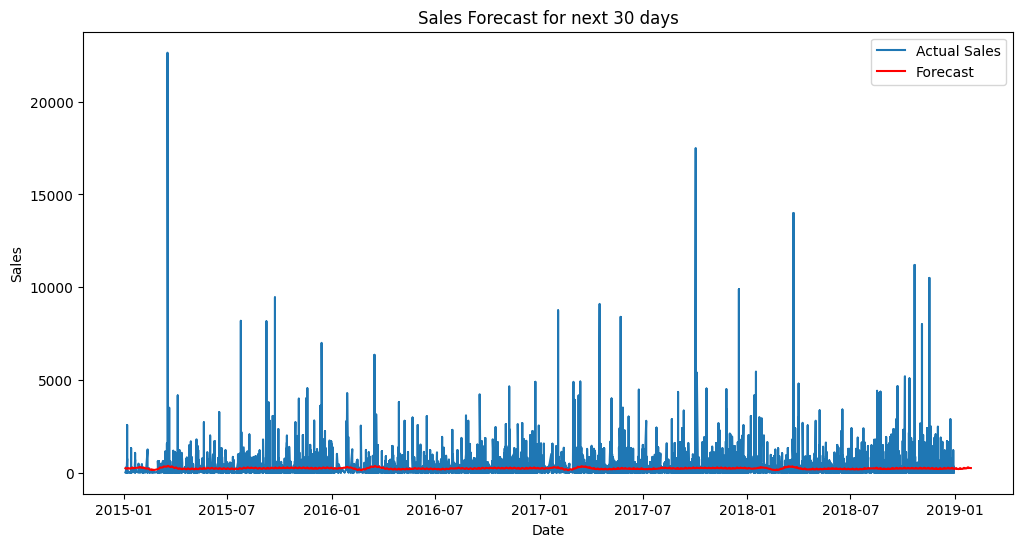

In [17]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from google.colab import files

# 1. Upload CSV manually
uploaded = files.upload()  # select your superstore.csv file
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name, encoding="latin1")

# 2. Prepare data
df = df[['Order Date', 'Sales']].rename(columns={'Order Date':'ds','Sales':'y'})
df['ds'] = pd.to_datetime(df['ds'], format='%d/%m/%Y')
df = df.sort_values('ds')

# 3. Train Prophet model
model = Prophet(daily_seasonality=True)
model.fit(df)

# 4. Forecast future sales
future_days = 30
future = model.make_future_dataframe(periods=future_days)
forecast = model.predict(future)

# 5. Align actuals and predictions
merged = pd.merge(df, forecast[['ds','yhat']], on='ds', how='left')
y_true = merged['y'].values
y_pred = merged['yhat'].values

# 6. Calculate metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
# Handle potential division by zero
mape = np.mean(np.abs((y_true - y_pred) / y_true[y_true != 0])) * 100 if np.any(y_true != 0) else 0


print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# 7. Plot actual vs forecast
plt.figure(figsize=(12,6))
plt.plot(df['ds'], df['y'], label='Actual Sales')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='red')
plt.title(f"Sales Forecast for next {future_days} days")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()